# ADM Homework 5 - USA Airport Flight Analysis

### Import Dataset and Libraries

In [13]:
!pip install kaggle pandas numpy matplotlib networkx

  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)


In [2]:
!kaggle datasets download flashgordon/usa-airport-dataset

Dataset URL: https://www.kaggle.com/datasets/flashgordon/usa-airport-dataset
License(s): CC0-1.0
 93%|███████████████████████████████████▎  | 38.0M/40.8M [00:01<00:00, 36.0MB/s]
100%|██████████████████████████████████████| 40.8M/40.8M [00:01<00:00, 23.0MB/s]


In [1]:
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Graph import *

0 -> [(1, 100), (2, 200)]
1 -> [(3, 300)]
2 -> [(3, 300)]
3 -> []


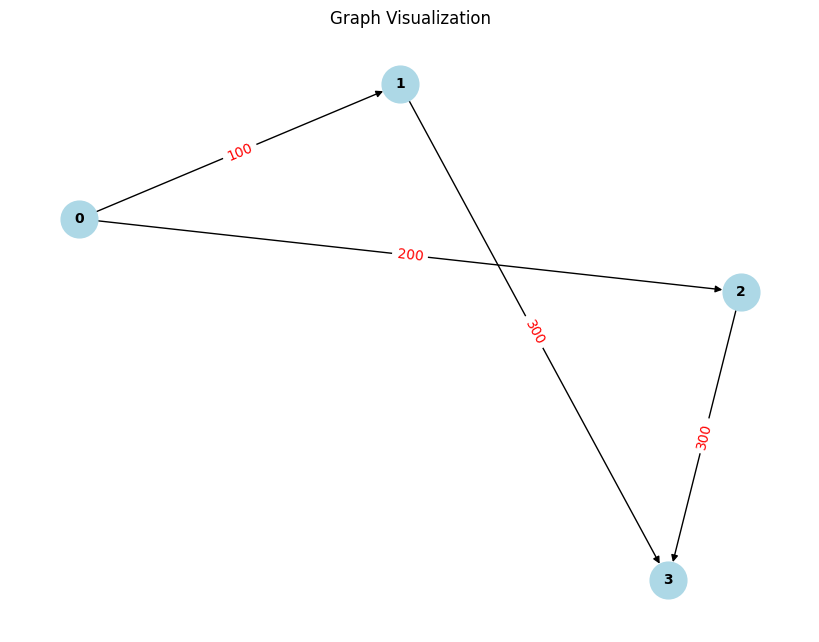

In [2]:
# Example usage
edges = [[0, 1, 100], [0, 2, 200], [1, 3, 300], [2, 3, 300]]
graph = Graph()
graph.build_graph(edges)
graph.display_graph()
graph.visualize_graph()

We unzip the file downloaded from Kaggle and save it to our current working directory.

In [5]:
# Unzip the file we downloaded from kaggle
zip_file_path = 'usa-airport-dataset.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('.') # extract files to current working directory

Now we save the data in a CSV file:

In [6]:
df = pd.read_csv('Airports2.csv')
df.head()

,Origin_airport,Destination_airport,Origin_city,Destination_city,Passengers,Seats,Flights,Distance,Fly_date,Origin_population,Destination_population,Org_airport_lat,Org_airport_long,Dest_airport_lat,Dest_airport_long
0,MHK,AMW,"Manhattan, KS","Ames, IA",21,30,1,254,2008-10-01,122049,86219,39.140999,-96.670799,NaN,NaN
1,EUG,RDM,"Eugene, OR","Bend, OR",41,396,22,103,1990-11-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
2,EUG,RDM,"Eugene, OR","Bend, OR",88,342,19,103,1990-12-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
3,EUG,RDM,"Eugene, OR","Bend, OR",11,72,4,103,1990-10-01,284093,76034,44.124599,-123.211998,44.254101,-121.150002
4,MFR,RDM,"Medford, OR","Bend, OR",0,18,1,156,1990-02-01,147300,76034,42.374199,-122.873001,44.254101,-121.150002


Considering the requirements, the **Dijkstra algorithm** can satisfy most of the requirements because it effectively searches for the path with the fewest cost to reach the destination. However, the algorithm needs to be extended to account for the maximum number of stops k that Arya can make. To achieve this, we incorporate the missing constraint into the algorithm.<br>
For efficient traversal, we can store the input list of flights as a graph using a dictionary, where each key represents a city code, and the value contains tuples of connected cities with their respective costs.<br>
To ensure that the algorithm does not revisit nodes unnecessarily, we can use a dictionary to store the minimum cost to reach each city with a specific number of moves. This prevents redundant calculations and avoids exploring more expensive paths that have already been considered.<br>
The algorithm starts with a list initialized to contain the starting city. Each entry in this list is represented as a tuple containing the total cost to reach the city, the city code, and the number of moves made so far. From the starting city, the algorithm iteratively explores paths to other cities. At each step, the city with the minimum cost is selected. If the number of moves required to reach that city exceeds the allowed k+1 stops, the path is considered invalid and discarded. If the city is the destination, the total cost to reach it is returned immediately.<br>
If the city has already been visited with a cheaper cost for the same number of moves, the current path is ignored because it would be more expensive. Otherwise, the path information, such as cost and moves, is recorded in the dictionary tracking the minimum cost to reach cities. From the current city, all directly connected neighbors are added to the exploration list, along with their updated costs and move counts.<br>
If the list is exhausted and no valid path to the destination has been found within the allowed number of stops, the algorithm returns -1, indicating that no valid route exists. <br>
The pseudocode is as follows:


**Function** cheapest_plan(n, flights, start, dst, k):<br>
**Input:**  
&nbsp;&nbsp;&nbsp;&nbsp;**n**: Number of cities (nodes)  
&nbsp;&nbsp;&nbsp;&nbsp;**flights**: List of (city, connected_city, cost)  
&nbsp;&nbsp;&nbsp;&nbsp;**start**: Starting city code 
&nbsp;&nbsp;&nbsp;&nbsp;**dst**: Destination city code 
&nbsp;&nbsp;&nbsp;&nbsp;**k**: Maximum allowed stops  

**Output:**  
&nbsp;&nbsp;&nbsp;&nbsp;Minimum cost to travel from **start** to **dst** within **k** moves, or -1 if not possible  

(1)&nbsp;&nbsp;&nbsp;&nbsp;k ← k + 1  

(2)&nbsp;&nbsp;&nbsp;&nbsp;graph ← empty dictionary  
(3)&nbsp;&nbsp;&nbsp;&nbsp;**For each** (city, connected_city, cost) **in** flights:  
(4)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**If** city not in graph:  
(5)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;graph[city] ← empty list  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**End If**  
(6)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Append (connected_city, cost) to graph[city]  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**End for**  

(7)&nbsp;&nbsp;&nbsp;&nbsp;min_cost ← empty dictionary  
(8)&nbsp;&nbsp;&nbsp;&nbsp;cities_to_reach ← [(0, start, 0)]  

(9)&nbsp;&nbsp;&nbsp;&nbsp;**While** cities_to_reach is not empty:  

(10)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;min_index ← 0  
(11)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**For** i from 1 to length of cities_to_reach - 1:  
(12)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**If** cities_to_reach[i][0] < cities_to_reach[min_index][0]:  
(13)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;min_index ← i  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**End If**<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**End for**  

(14)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(current_cost, current_city, moves) ← pop min_index from cities_to_reach  
(15)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**If** moves > k:  
(16)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Continue**  <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**End If**<br> 
(17)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**If** current_city is equal to dst:  
(18)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Return** current_cost<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**End If**<br>  
(19)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**If** (current_city, moves) in min_cost **AND** min_cost[(current_city, moves)] ≤ current_cost:  
(20)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**Continue**<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**End If**<br>  
(21)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;min_cost[(current_city, moves)] ← current_cost  

(22)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**For each** (connected_city, cost) **in** graph.get(current_city):  
(23)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Append (current_cost + cost, connected_city, moves + 1) to cities_to_reach  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**End for**  

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;**End while**  

(24)&nbsp;&nbsp;&nbsp;&nbsp;**Return** -1  

**End**


In [7]:
def cheapest_plan(n, flights, start, dst, k):
    
    """
    :param n: Number of cities (nodes)
    :param flights: List of (city, connected_city, cost)  
    :param start: Starting city code 
    :param dst: Destination city code
    :param k: Maximum allowed stops 
    :return: The cost to reach the destination, or -1 if not possible within max_moves.
    """

    k=k+1
    #Build graph from flights list
    graph = {}
    for city, connected_city, cost in flights:
        if city not in graph:
            graph[city] = []
        graph[city].append((connected_city, cost))

    #Dictionary to track the minimum cost to each cities within a specific number of moves
    min_cost = {}
    #List to track the unreached cities
    cities_to_reach = [(0, start, 0)]

    while cities_to_reach:
        #Find the city with the smallest cost
        min_index = 0
        for i in range(1, len(cities_to_reach)):
            if cities_to_reach[i][0] < cities_to_reach[min_index][0]:
                min_index = i

        current_cost, current_city, moves = cities_to_reach.pop(min_index)

        #If we've made more moves than allowed, skip this path
        if moves > k:
            continue
        #If we reached the destination within the move limit, return the cost
        if current_city == dst:
            return current_cost
        #Check if we've already visited this city with fewer or equal moves
        if (current_city, moves) in min_cost and min_cost[(current_city, moves)] <= current_cost:
            continue
        #Record the minimum cost for this city and move count
        min_cost[(current_city, moves)] = current_cost

        #Connected cities
        for connected_city, cost in graph.get(current_city, []):
            cities_to_reach.append((current_cost + cost, connected_city, moves + 1))

    #No path found within the move limit
    return -1

In [11]:
test_cases=[(4,[[0, 1, 100], [1, 2, 100], [2, 0, 100], [1, 3, 600], [2, 3, 200]]  ,0,3,1),
            (3,[[0, 1, 100], [1, 2, 100], [0, 2, 500]]  ,0,2,1),
            (3,[[0, 1, 100], [1, 2, 100], [0, 2, 500]]  ,0,2,0),
            (4,[[0, 1, 100], [0, 2, 200], [1, 3, 300], [2, 3, 300]]  ,0,3,2),
            (4,[[0, 1, 100], [0, 2, 200], [1, 3, 300], [2, 3, 200]] ,0,3,2)            
            ]

for n,flights,src,dst,k in test_cases:
    result = cheapest_plan(n,flights, src, dst, k)
    print(f"Minimum cost to reach {dst} within {k+1} moves: {result}")

Minimum cost to reach 3 within 2 moves: 700
Minimum cost to reach 2 within 2 moves: 200
Minimum cost to reach 2 within 1 moves: 500
Minimum cost to reach 3 within 3 moves: 400
Minimum cost to reach 3 within 3 moves: 400


We are going to break down the time complexity and space complexity of our algorithm to understand whether it is efficient.

### Time Complexity:
The rows (1) and (2) have constant complexity.  
The rows (3)–(6) have a complexity of $O(m)$, where m is the length of flights, since they iterate over the parameter flights.  
The rows (7) and (8) have constant complexity.  

The while loop (9)–(24) appears to be the most computationally expensive part of the algorithm; let's break down its elements. Since it loops over the cities_to_reach list, each city can be visited multiple times if it is reached with fewer costs or within a different number of flights. So, in the worst case, the while loop will iterate $( \text{number of cities } n \times \text{maximum number of flights } (k+1) )$ times. Omitting the +1 , because it is less dominant, it iterates $( n \times k )$ times, thus it has $( O(n \cdot k) )$ as its complexity. Then:

- Row (10): Has constant complexity.  
- Rows (11)–(13): Iterate over the cities_to_reach list as well, so they also have $ O(n \cdot k)$ as time complexity in the worst case.  
- Rows (14)–(21): Have constant complexity.  
- The for loop in rows (22)–(23): Has $ O(m) $ as time complexity in the worst case, where m is the number of flights.  
- Row (24): Has constant complexity.  

In summary, the while loop will have $ O((n \cdot k)^2 + m) $ as its complexity, considering the worst-case scenario. Since m is less dominant, the loop's time complexity can be simplified to $ O((n \cdot k)^2) $.

Now, we can combine it with the time complexity of the rows (3)–(6), which is $ O(m)$. However, it is less dominant compared to the while loop, so we are going to omit it. Thus, the final time complexity of the algorithm is $ O((n \cdot k)^2) $.
big o notation are not working